<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/cat_vs_dog_Image_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle

In [2]:
import kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
100% 774M/775M [00:08<00:00, 36.5MB/s]
100% 775M/775M [00:08<00:00, 95.0MB/s]


In [4]:
!unzip -q dog-and-cat-classification-dataset.zip

- In the previous example we are unable to process the entire images. We took only 6000 images each 300 images of cat and 300 images of dog
-The main problem we faced is loading entire images into the RAM for prepocessing the images like **Normalize the image,resize the images etc**
- To resolve the issued we have two options:
  - Increase the size of RAM
  - Load the images at the time of  model.fit with batch size

- Increse the size of RAM is possible because today we have 25k imgages but tommorow we have may be millions of images. Hence only options is left is Load the images in batch size.
- Please note while loading the image in X_train is the main problem because we are loading the entire number of images in the RAM

-Therefore to avoid such cases we will use **Image Data Generator**

**Image Data Generator***<br/>
- Using ImageDataGenerator in TensorFlow/Keras is an efficient way to handle large image datasets without running out of memory. It loads images in batches instead of storing them all in memory at once.

- In earlier method we used to <br/>
  ->  Read the Images -> Convert into Array -> Preprocessing the Images -> Create the DL Model

- Image Data Generator we will define the process
  -> Read the image -> Convert into Array -> PreProcess the image -> Create the DL Model (batchsize =32)

- Here We start to run the model ,the model will ask for 32 images as the batchsize is 32. The batch size will the prepocessing step to provide 32 images. Then the prepocessing will ask for 32 images to array then array will ask for 32 images to Image data Generator.

- Now only 32 images will read and convert the 32 images into arrary. the preprocessing will happen for 32 images only and only 32 images will be given to keras for modelling and only 32 images will go for modelling purpose.

- It means at any given point of time only 32 images will used to modelling purpose only irrespective of any number of images.

- *Note:* 32 images is the hyperparameter

In [ ]:
# Image data Generator helps to read the image when it is required.

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os
import shutil
from tqdm.auto import tqdm

IDG (Image Data Generators) works on specfic folder structure

In [ ]:
# Master Folder
#  |---Cat
#     |--Cat01.jpg
#     |--Cat02.jpg
#     |--Cat03.jpg
#     |--Cat04.jpg
#     |--Cat05.jpg
#     |--Cat06.jpg
#     |--...........
#  |-- Dog
#     |--Dog01.jpg
#     |--Dog02.jpg
#     |--Dog03.jpg
#     |--Dog04.jpg
#     |--Dog05.jpg
#     |--Dog06.jpg
#     |--...........

In [6]:
batch_size =64
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split =0.1,
                                                      rescale = 1/255.0
                                                    )

In [19]:
train_idg =idg.flow_from_directory(directory = 'PetImages',
                                   target_size =(150,150),
                                   batch_size = batch_size,
                                   subset = 'training',
                                   interpolation="bilinear"  ) # Helps with truncated images


Found 22500 images belonging to 2 classes.


In [20]:
val_idg = idg.flow_from_directory(directory = 'PetImages',
                                   target_size =(150,150),
                                   batch_size = batch_size,
                                   subset = 'validation')

Found 2498 images belonging to 2 classes.


In [21]:
# Create the model
model =tf.keras.Sequential()

# Add the Input layer
model.add(tf.keras.layers.Input(shape =(150,150,3),name ='Input_Layer'))
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten(name ='Flatten_Layer'))
# Add the Hidden layer

model.add(tf.keras.layers.Dense(512,activation=tf.keras.activations.relu,name='HL1'))
model.add(tf.keras.layers.Dense(256,activation=tf.keras.activations.relu,name='HL2'))
model.add(tf.keras.layers.Dense(128,activation=tf.keras.activations.relu,name='HL3'))
model.add(tf.keras.layers.Dense(64,activation=tf.keras.activations.relu,name='HL4'))
model.add(tf.keras.layers.Dense(32,activation=tf.keras.activations.relu,name='HL5'))
model.add(tf.keras.layers.Dense(8,activation=tf.keras.activations.relu,name='HL6'))

# Add the Output layer

model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax,name='Output_Layer'))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Flatten_Layer (Flatten)              │ (None, 67500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL1 (Dense)                          │ (None, 512)                 │      34,560,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL2 (Dense)                          │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL3 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL4 (Dense)                          │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL5 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HL6 (Dense)                          │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,735,354 (132.50 MB)

 Trainable params: 34,735,354 (132.50 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics =['accuracy'])

In [23]:
model.fit(train_idg,epochs=10,validation_data=val_idg,batch_size=batch_size)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 193s 546ms/step - accuracy: 0.5519 - loss: 0.6879 - val_accuracy: 0.5765 - val_loss: 0.6771
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 183s 519ms/step - accuracy: 0.5974 - loss: 0.6651 - val_accuracy: 0.5520 - val_loss: 0.6943
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 184s 523ms/step - accuracy: 0.6106 - loss: 0.6570 - val_accuracy: 0.5985 - val_loss: 0.6688
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 191s 542ms/step - accuracy: 0.6258 - loss: 0.6458 - val_accuracy: 0.6161 - val_loss: 0.6581
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 187s 531ms/step - accuracy: 0.6303 - loss: 0.6398 - val_accuracy: 0.6169 - val_loss: 0.6506
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 183s 520ms/step - accuracy: 0.6406 - loss: 0.6335 - val_accuracy: 0.6245 - val_loss: 0.6515
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 218s 566ms/step - accuracy: 0.6447 - loss: 0.6244 - val_accuracy: 0.6309 - val_loss: 0.6364
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 188s 533ms/step - accuracy: 0.6492 -

In [24]:
train_idg.class_indices

{'Cat': 0, 'Dog': 1}

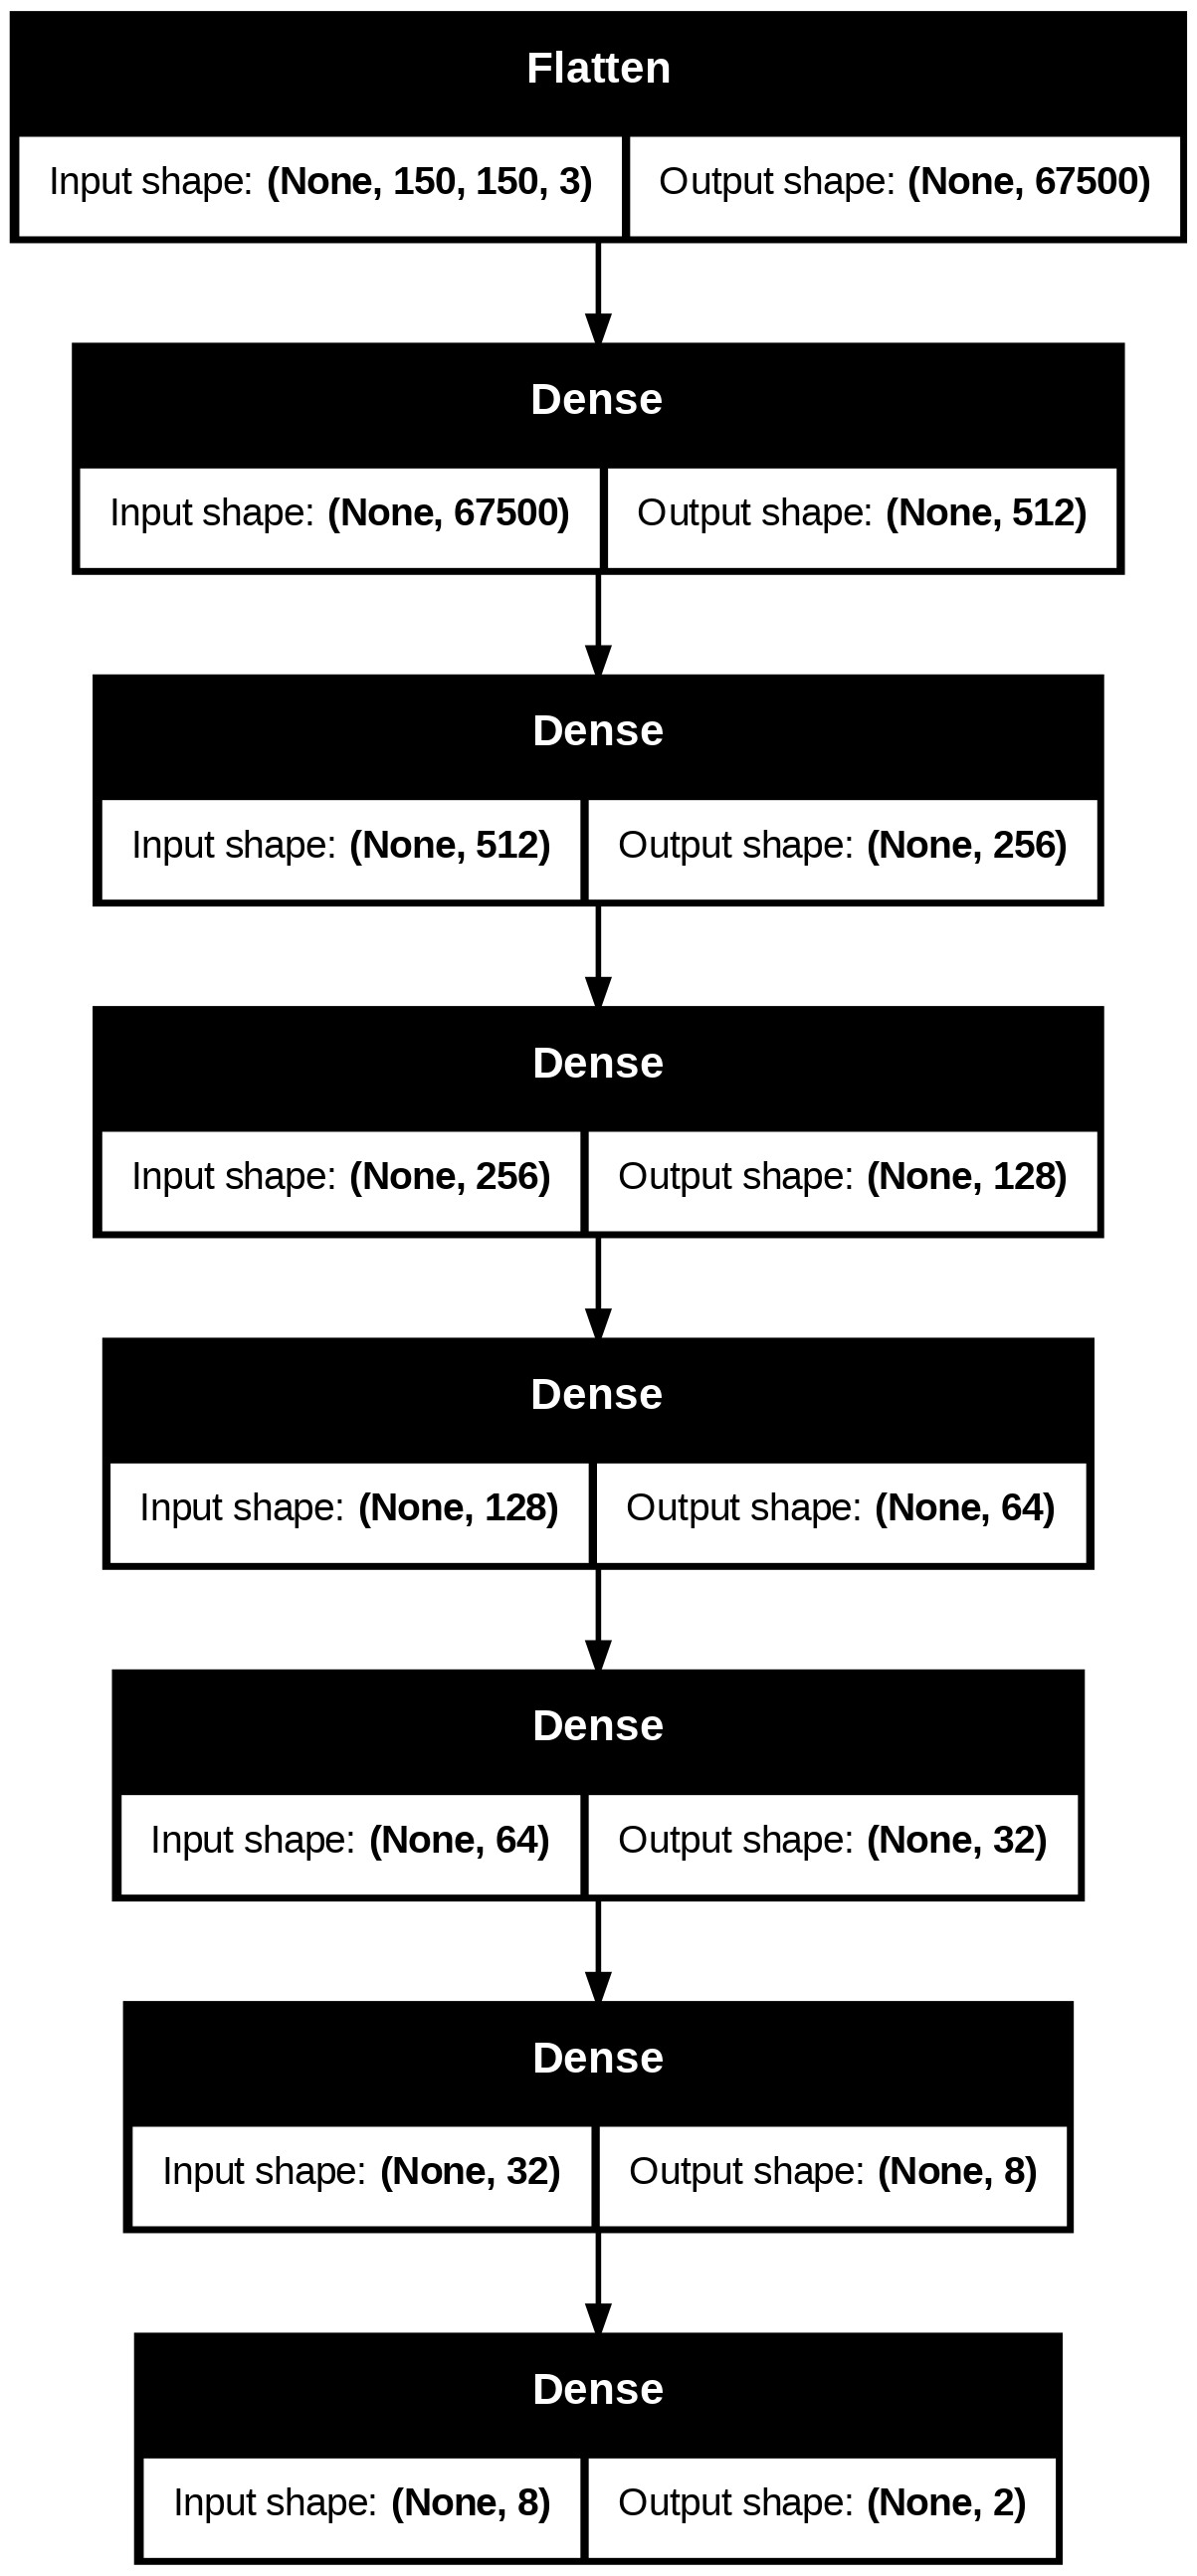

In [25]:
# plot the model
tf.keras.utils.plot_model(model,show_shapes=True)